<a href="https://colab.research.google.com/github/EZZRITOE/Nairobi-Hospital--hypothyroid-Model/blob/main/Ezra_Mageto_Wk_8_ip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the question
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

#The Metric for Success
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

##Importing Libraries

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns; sns.set(font_scale=1.2); sns.set(rc={'figure.figsize':(10, 8)})
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import warnings


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


##Loading the dataset

In [2]:
#reading the csv file
#reading the head of the dataset
hypo=pd.read_csv('hypothyroid.csv')
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [3]:
#reading the bottom of the dataset
hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


##Exploring the dataset

In [4]:
#checking the shape of the dataset
print('shape of the dataset'+str(hypo.shape))

shape of the dataset(3163, 26)


In [5]:
#information on the dataset
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [6]:
#checking the columns in the dataset
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

##Cleaning the dataset

In [7]:
# previewing the unique values of each of our columns

my_cols = hypo.columns.to_list()

for column in my_cols:
    print("\n")
    print("Column Name:", column)
    print(hypo[column].unique())



Column Name: status
['hypothyroid' 'negative']


Column Name: age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


Column Name: sex
['M' 'F' '?']


Column Name: on_thyroxine
['f' 't']


Column Name: query_on_thyroxine
['f' 't']


Column Name: on_antithyroid_medication
['f' 't']


Column Name: thyroid_surgery
['f' 't']


Column Name: query_hypothyroid
['f' 't']


Column Name: query_hyperthyroid
['f' 't']


Column Name: pregnant
['f' 't']


Column Name: sick
['f' 't']


Column Name: tumor
['f' 't']


Column Name: lithium
['f' 't']


Column Name: goitre
['f' 't']


Column Name

There is '?' symbol in some columns it should be replaced with numericals

In [8]:
# turning the values with '?' 
questions = ['age', 'sex', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for question in questions:
    hypo[question] = hypo[question].replace('?', np.nan)

In [9]:
#checking for missing values
hypo.isnull().sum()
#the missing values are alot removing them will affect my analysis

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [10]:
#checking the datatypes
hypo.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [11]:
#converting the following datatypes to numericals
numeric = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

for col in numeric:
  hypo[[col]] = hypo[[col]].apply(pd.to_numeric)

hypo.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [12]:
# describing the numerical features
hypo.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


In [13]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

##Univariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


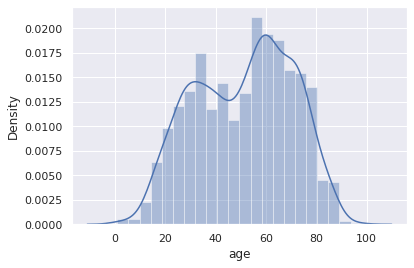

In [14]:
# looking at distribution of age 
sns.distplot(hypo.age)
#there is a normal distribution on the age

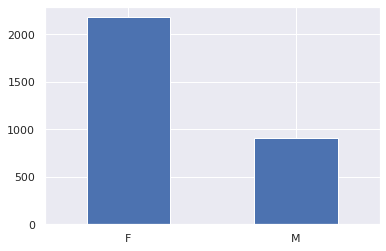

In [15]:
# previewing our data set's gender distribution
hypo.sex.value_counts().plot(kind = 'bar', rot = 0)
#the gender distribution is biased there are more female than male

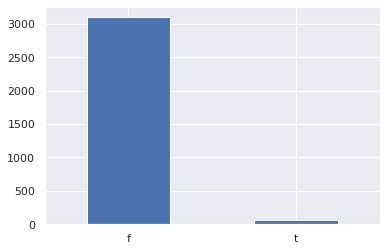

In [16]:
# distribution of pregnancy
hypo.pregnant.value_counts().plot(kind = 'bar', rot = 0)
#most of the respondents are not pregnant

In [17]:
# creating lists containing the column names stored in their respective lists

tests_measured = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 
                  'FTI_measured', 'TBG_measured']

categorical = ['on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication',
               'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid']

others = ['pregnant', 'sick', 'tumor', 'lithium', 'goitre']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

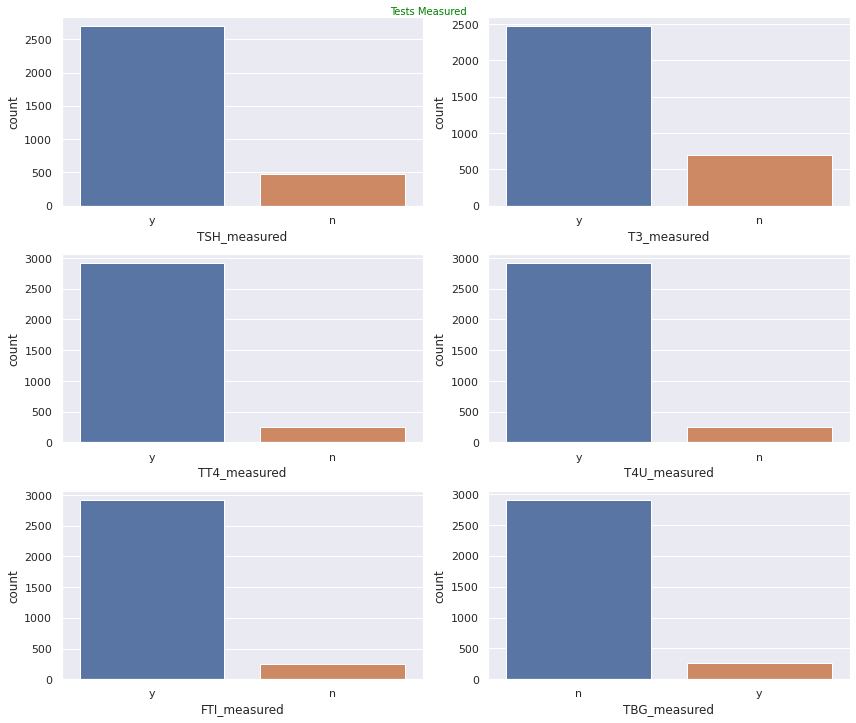

In [18]:

# plotting the distribution of the tests measured
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle('Tests Measured', fontsize = 10, y = 1.0, 
             color = 'green')

for ax, data, column in zip(axes.flatten(), hypo, tests_measured):
    sns.countplot(hypo[column], ax = ax)
    
plt.tight_layout()
#the respective tests measured have a high count of yes responses apart from the TBG measure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

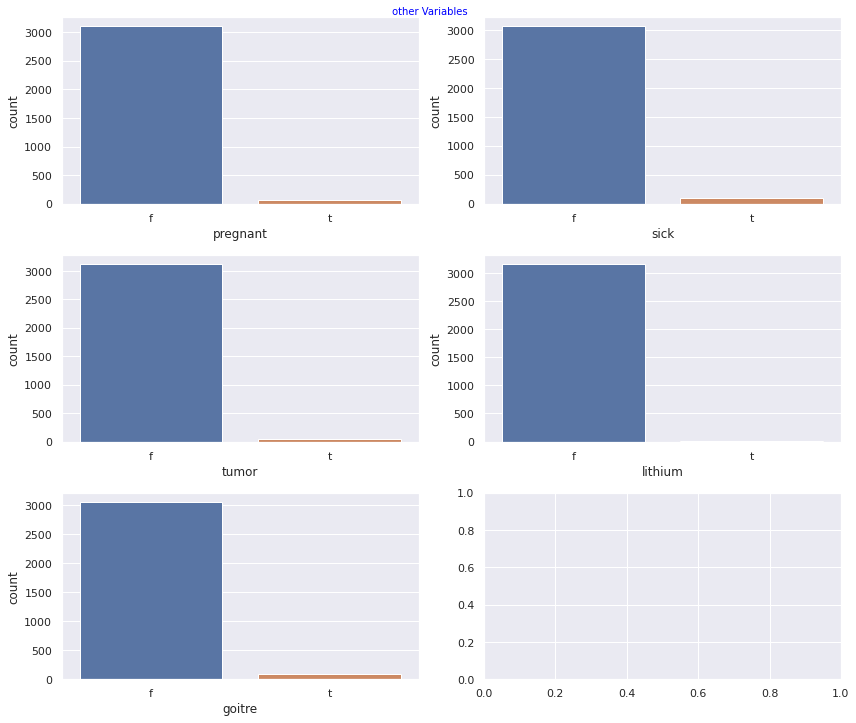

In [19]:

# plotting the distribution of the rest of the variables
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 10))
plt.suptitle(' other Variables', fontsize = 10, y = 1.0,
             color = 'blue')

for ax, data, column in zip(axes.flatten(), hypo, others):
    sns.countplot(hypo[column], ax = ax)
    
plt.tight_layout()
#majority of the variable have a false indication of hypothyroid present.This can be bias because i cannot make a conclusive 
#prediction

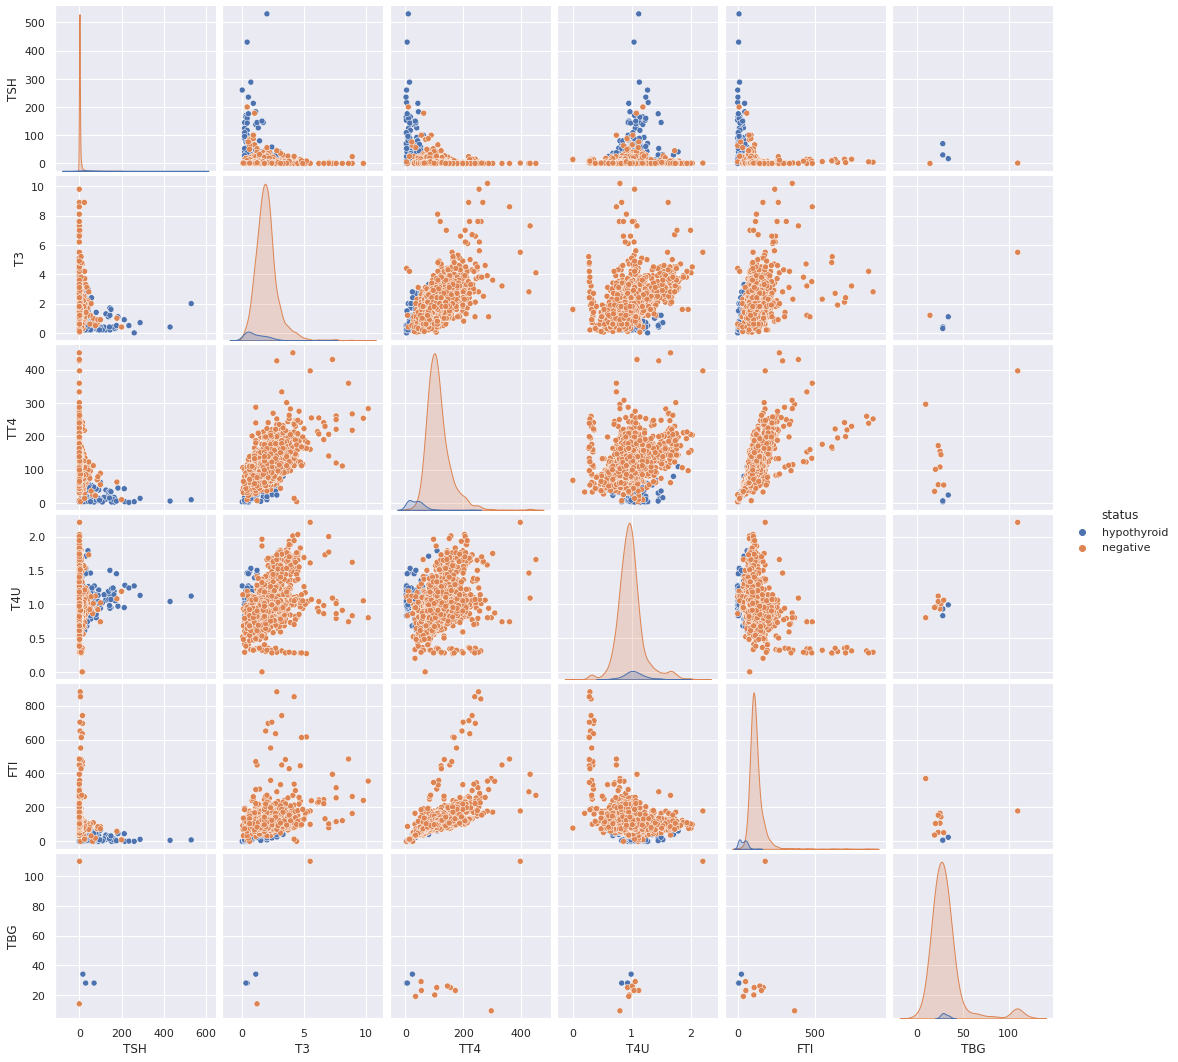

In [20]:

# scatterplot of test results
numerical = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']

sns.pairplot(hypo, kind = "scatter", diag_kind = "kde", vars = numerical,
            hue = "status")
#hypothyroidism is more present in the TSH test

negative       3012
hypothyroid     151
Name: status, dtype: int64


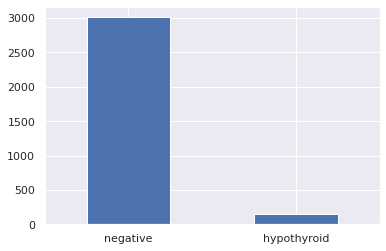

In [21]:

# distribution of hypothyroidism status
hypo.status.value_counts().plot(kind = 'bar', rot = 0)
print(hypo.status.value_counts())
#negative results are more than the positive hypothyroid cases. This will bring bias in the results

##Multi variate Analysis

In [22]:
# checking the correlation between variables
hypo.corr()


,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.009155,-0.332307,-0.103116,-0.226361,0.027389,-0.174584
TSH,-0.009155,1.000000,-0.187229,-0.321945,0.071171,-0.265294,-0.352416
T3,-0.332307,-0.187229,1.000000,0.602734,0.410819,0.328370,0.951505
TT4,-0.103116,-0.321945,0.602734,1.000000,0.322862,0.684969,0.569442
T4U,-0.226361,0.071171,0.410819,0.322862,1.000000,-0.283284,0.963883
FTI,0.027389,-0.265294,0.328370,0.684969,-0.283284,1.000000,0.028285
TBG,-0.174584,-0.352416,0.951505,0.569442,0.963883,0.028285,1.000000


#Modeling

In [23]:
hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [24]:
#dropping columns we dont need

hypo = hypo.drop(columns = [  'TSH_measured','TBG_measured','T3_measured','T4U_measured','TT4_measured','FTI_measured', 'TBG'
                           ], axis = 1)
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


##Encoding categorical variables

In [25]:

# Create a dictionary to manually encode the categorical data
dict_data = {"sex": {"M": 1, "F": 0},
              'on_thyroxine': {"t": 1, "f": 0},
               "query_on_thyroxine": {"t": 1, "f": 0},
                "on_antithyroid_medication": {"t": 1, "f": 0},
                "thyroid_surgery": {"t": 1, "f": 0},
                "query_hypothyroid": {"t": 1, "f": 0},
               "query_hyperthyroid": {"t": 1, "f": 0},
                "pregnant": {"t": 1, "f": 0},
                "sick" : {"t": 1, "f": 0},
                "tumor": {"t": 1, "f": 0},
                "lithium": {"t": 1, "f": 0},
                "goitre": {"t": 1, "f": 0},
                }
hypo.replace(dict_data, inplace=True)

In [26]:
#checking the changes
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,1.0,0,0,0,0,0,0,0,0,0,0,0,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,0.0,1,0,0,0,0,0,0,0,0,0,0,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,0.0,0,0,0,0,0,0,0,0,0,0,0,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,1.0,0,0,0,0,0,0,0,0,0,0,0,7.3,1.2,57.0,1.28,44.0


In [27]:
hypo.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH                          468
T3                           695
TT4                          249
T4U                          248
FTI                          247
dtype: int64

In [28]:
# Filling the missing values of numeric features
for col in numeric:
  hypo.fillna(0, inplace = True)
  
# For categorical features
categ =  ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
       'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium',
       'goitre']

for i in categ:
  hypo.fillna('null', inplace = True)

##Random Forest

In [29]:
# splitting our data into features & labels
X = hypo.drop(columns = ['status']).values
y = hypo.status.values

# getting our feature names
features = hypo.columns.to_list()
features.remove('status')

print(X.shape)
print(y.shape)

(3163, 18)
(3163,)


In [30]:
# Selecting the independent and target variables
X = hypo.drop('status', axis = 1)
y = hypo.status

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Modeling

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

comparison_frame.describe()
#the actual and predicted values are almost the same

,Actual,Predicted
count,633,633
unique,2,2
top,negative,negative
freq,607,606


In [31]:
# Measuring the accuracy of the model
#
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9826224328593997


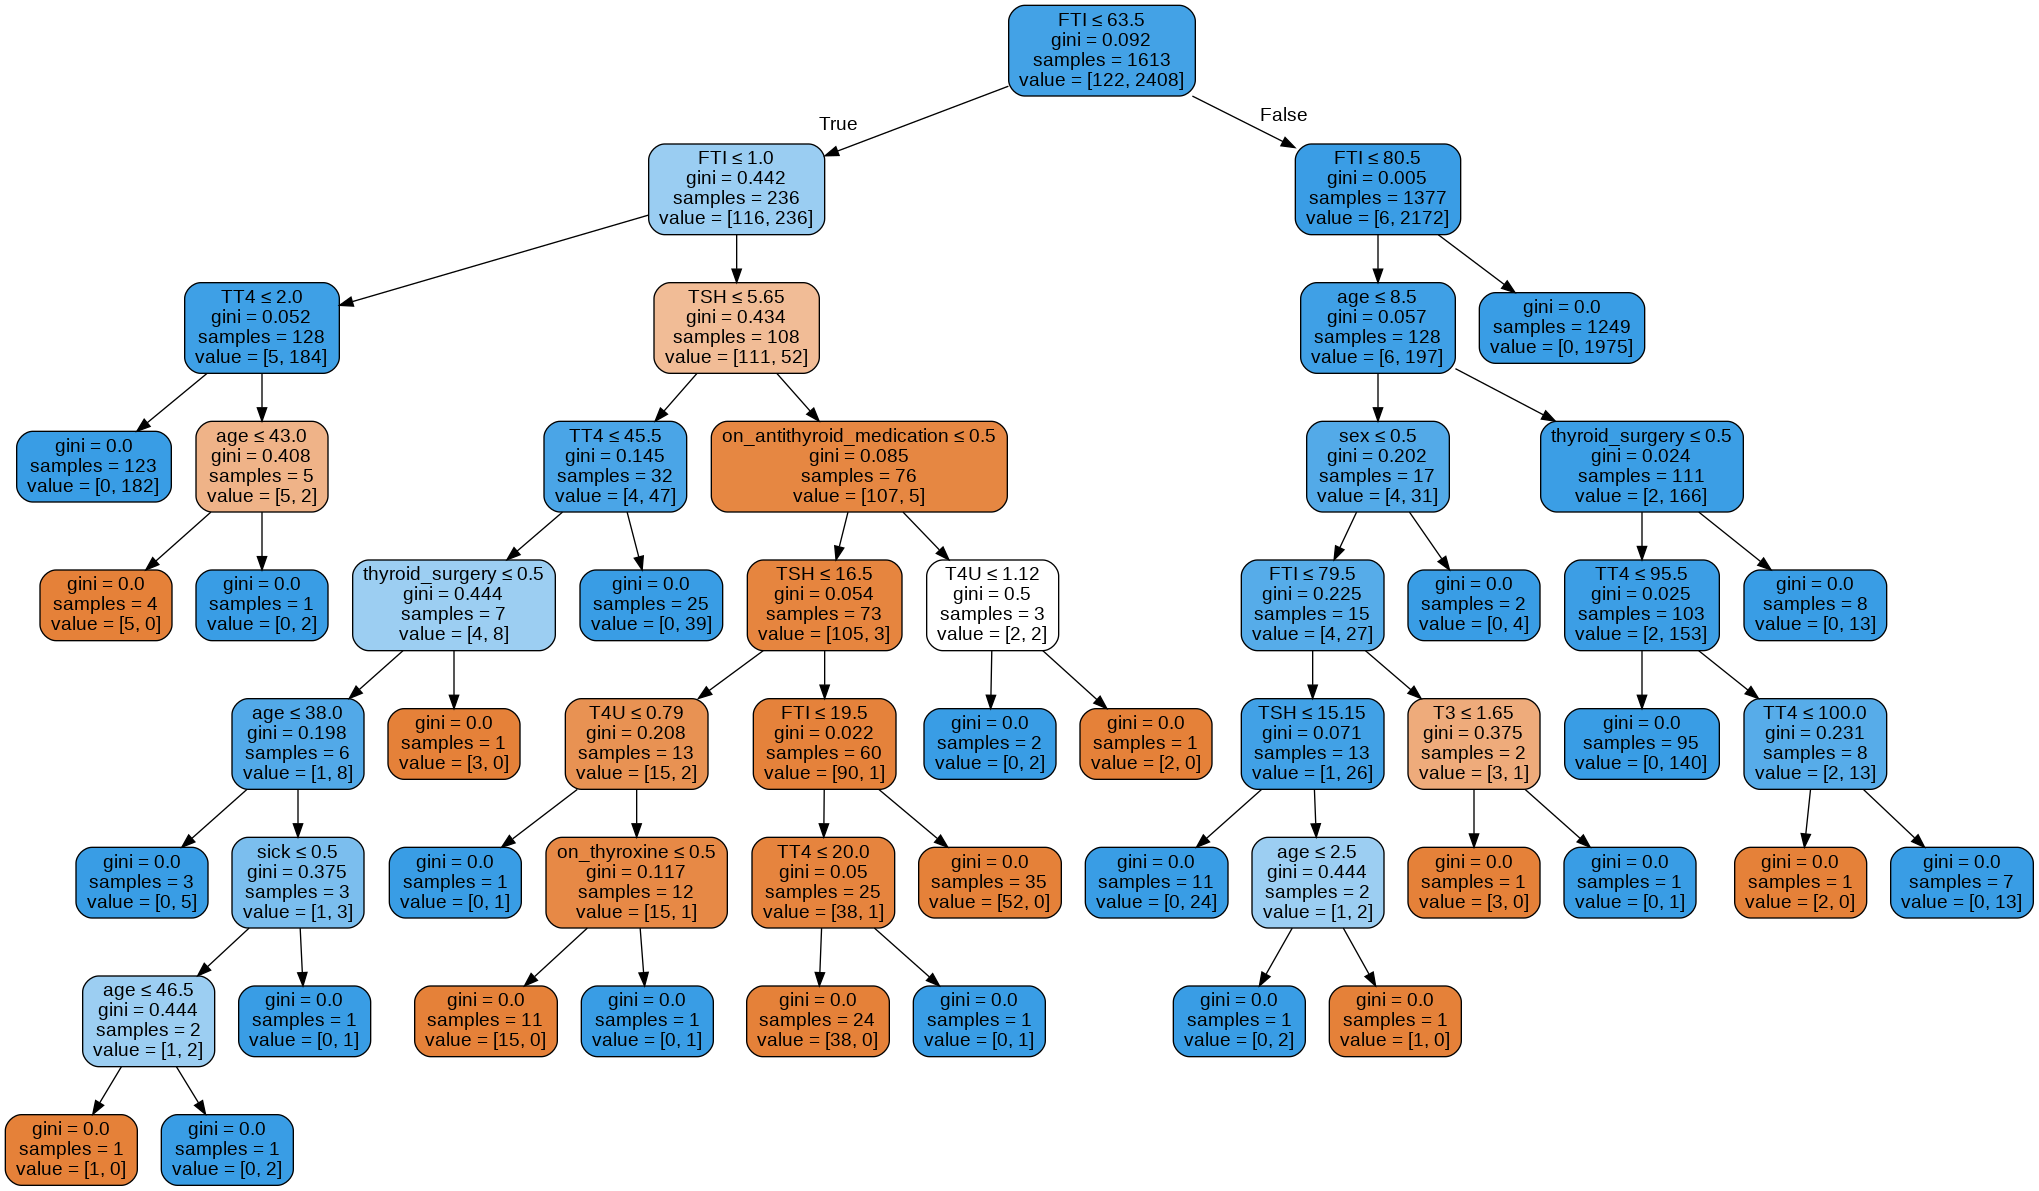

In [33]:
from sklearn.tree import export_graphviz#Visualization of the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[23]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [34]:

#feature selection
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]

# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances
#TSH is the most important feature to consider in relation to hypothyroidism.The other features did not post a
#significant value

[('FTI', 0.62),
 ('TSH', 0.24),
 ('TT4', 0.06),
 ('age', 0.03),
 ('thyroid_surgery', 0.02),
 ('T4U', 0.02),
 ('on_thyroxine', 0.01),
 ('on_antithyroid_medication', 0.01),
 ('T3', 0.01),
 ('sex', 0.0),
 ('query_on_thyroxine', 0.0),
 ('query_hypothyroid', 0.0),
 ('query_hyperthyroid', 0.0),
 ('pregnant', 0.0),
 ('sick', 0.0),
 ('tumor', 0.0),
 ('lithium', 0.0),
 ('goitre', 0.0)]

# Support Vector Machine

In [35]:
# features & label 
X = hypo.drop(columns = 'status').values
y = hypo['status'].values
print(X.shape)
print(y.shape)

(3163, 18)
(3163,)


In [38]:
# Principal Component Analysis (PCA) for variable reduction in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit(X)
X = pca.transform(X)
X.shape

(3163, 3)

In [40]:
 #splitting into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:

# importing  SVM model and setting kernel to linear

from sklearn.svm import SVC
linear = SVC(kernel = 'linear')

# fitting to training data
linear.fit(X_train, y_train)

# making predictions
lin_y_pred = linear.predict(X_test)

# assessing the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Linear kernel score:", accuracy_score(y_test, lin_y_pred))
print("Linear kernel confusion matrix:\n", confusion_matrix(y_test, lin_y_pred))

In [ ]:
#  polynomial kernel
poly = SVC(kernel = 'poly', gamma = 'auto')

# training the model
poly.fit(X_train, y_train)

# making prediction
poly_y_pred = poly.predict(X_test)

# assessing the model
print("Polynomial kernel score:", accuracy_score(y_test, poly_y_pred))
print("Polynomial kernel confusion matrix:\n", confusion_matrix(y_test, poly_y_pred))

In [ ]:
#  rbf kernel
rbf = SVC(kernel = 'rbf', gamma = 'auto')

# training the model
rbf.fit(X_train, y_train)

# making prediction
rbf_y_pred = rbf.predict(X_test)

# assessing the model
print("RBF kernel score:", accuracy_score(y_test, rbf_y_pred))
print("RBF kernel confusion matrix:\n", confusion_matrix(y_test, rbf_y_pred))

#Conclusion
The dataset was biased. The number of the female was more compared to the male.Hypothyroid was also not equally distributed.But overall the model performed well